In [1]:
# Importing the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [4]:
df = pd.read_csv('honeyproduction.csv')
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [5]:
# Getting the mean production per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


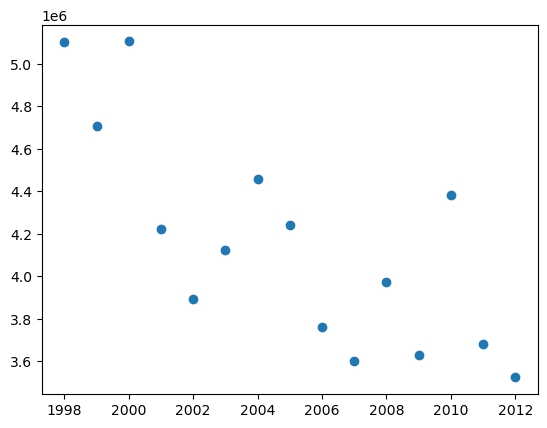

In [6]:
# View scatterplot to see if data is linear
X = prod_per_year['year']
X = X.values.reshape(-1,1) # Into 2D 1x1 matrix to feed into number plot
y = prod_per_year['totalprod']

plt.scatter(X, y)
plt.show()

I'd say there is a vaguely linear relationship among X, y. We move on to create and fit the linear regression model

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
print(regr.coef_) 
print(regr.intercept_)

[-88303.18915238]
181208083.10732982


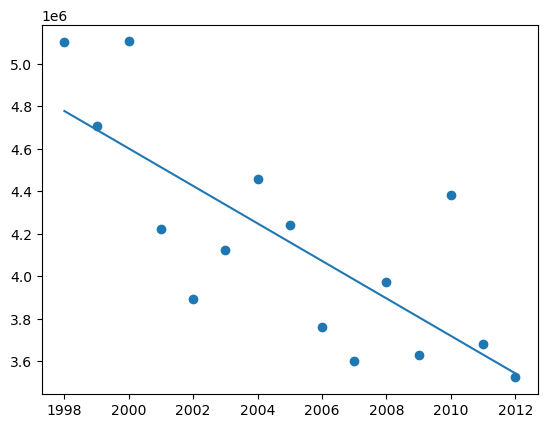

In [9]:
y_pred = regr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

Predicting the honey decline over the next few years (till 2050)

In [11]:
X_future = np.array(range(2013,2050))
# print(X_future)
X_future = X_future.reshape(-1,1) # Transpose
# print(X_future)

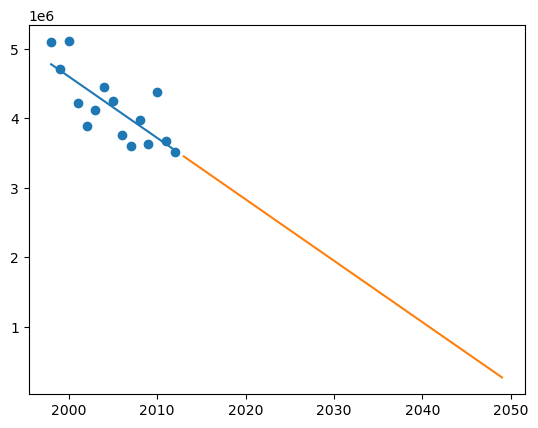

In [13]:
future_pred = regr.predict(X_future)
plt.scatter(X, y) # Actual data scattered
plt.plot(X, y_pred) # Line of best fit from actual data (blue line)
plt.plot(X_future, future_pred) # Prediction till 2050 (orange line)
plt.show()